<a href="https://colab.research.google.com/github/mwoodward1990/colab-notebooks-general-collection/blob/main/RSITradingStrategyTechnicalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: Use the Relative Strength Index (RSI) and Python to determine if a stock is being over bought or over sold

# If a stock is over sold than this indicates that this is a good time to buy the stock
# If a stock is over bought than this indicates that this is a good time to sell the stock
# RSI metrics go here -> 0 - 100. Under 30 is undersold, over 70 is considered over bought


In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving GOOG_Stock.csv to GOOG_Stock.csv


In [ ]:
# Store the data
FB = pd.read_csv('GOOG_Stock.csv')
# Show data
FB


# Run cell after data has been imported

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
...,...,...,...,...,...,...,...
2330,2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2331,2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2332,2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000
2333,2018-08-28,1255.900024,1256.560059,1242.969971,1245.859985,1245.859985,1366500


In [ ]:
# Set the date as the index for the data
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB


# Run cell after data has been imported

,Date,Open,High,Low,Close,Adj Close,Volume
2009-05-22,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
...,...,...,...,...,...,...,...
2018-08-23,2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2018-08-24,2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2018-08-27,2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000
2018-08-28,2018-08-28,1255.900024,1256.560059,1242.969971,1245.859985,1245.859985,1366500


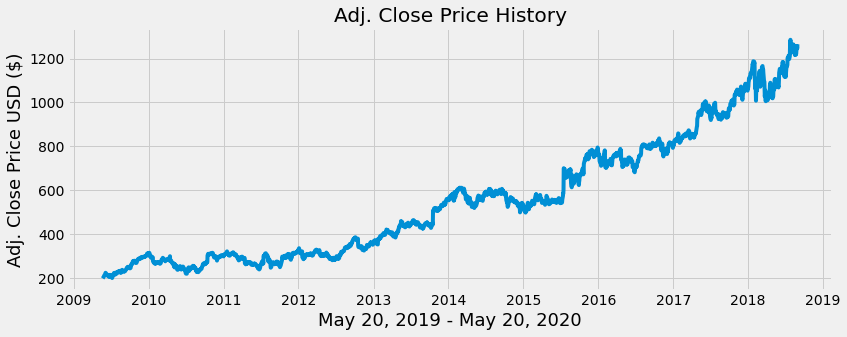

In [ ]:
# Visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(FB.index, FB['Adj Close'], label = 'Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('May 20, 2019 - May 20, 2020', fontsize = 18)
plt.ylabel('Adj. Close Price USD ($)', fontsize = 18)
plt.show()


# Run cell after data has been imported

In [ ]:
# Prepare the data to calculate the RSI

# Get the difference in price from the previous day
# delta key word usually stands for "change"
delta = FB['Adj Close'].diff(1)
delta


# Run cell after data has been imported

2009-05-22          NaN
2009-05-26     5.435440
2009-05-27     0.600601
2009-05-28     2.422425
2009-05-29     3.418411
                ...    
2018-08-23    -0.589966
2018-08-24    15.589966
2018-08-27    19.520020
2018-08-28   -10.410035
2018-08-29    18.790039
Name: Adj Close, Length: 2335, dtype: float64

In [ ]:
# Get rid of NaN
delta = delta.dropna()
delta


# Run cell after data has been imported

2009-05-26     5.435440
2009-05-27     0.600601
2009-05-28     2.422425
2009-05-29     3.418411
2009-06-01     4.669678
                ...    
2018-08-23    -0.589966
2018-08-24    15.589966
2018-08-27    19.520020
2018-08-28   -10.410035
2018-08-29    18.790039
Name: Adj Close, Length: 2334, dtype: float64

In [ ]:
# Get the positive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0


# Run cell after data has been imported

In [ ]:
# Get the time period
period = 14
# Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [ ]:
# Calculate the RSI

# Calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
# Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 +RS))

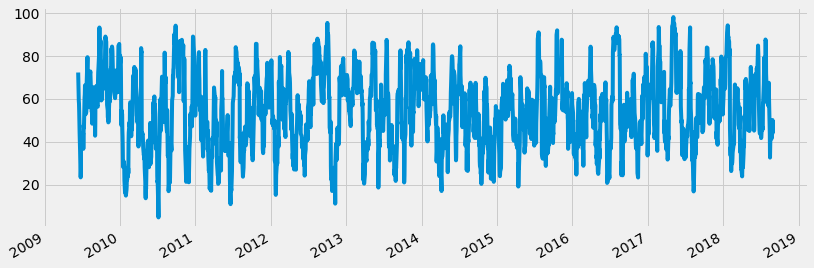

In [ ]:
# Show the RSI visually
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()


# Run cell after data has been imported

In [ ]:
# Put it all together

# Create a new data frame
new_df = pd.DataFrame()
new_df['Adj Close Price'] = FB['Adj Close']
new_df['RSI'] = RSI
new_df

# Run cell after data has been imported

,Adj Close Price,RSI
2009-05-22,196.946945,NaN
2009-05-26,202.382385,NaN
2009-05-27,202.982986,NaN
2009-05-28,205.405411,NaN
2009-05-29,208.823822,NaN
...,...,...
2018-08-23,1221.160034,42.304887
2018-08-24,1236.750000,49.633623
2018-08-27,1256.270020,50.169433
2018-08-28,1245.859985,44.132599


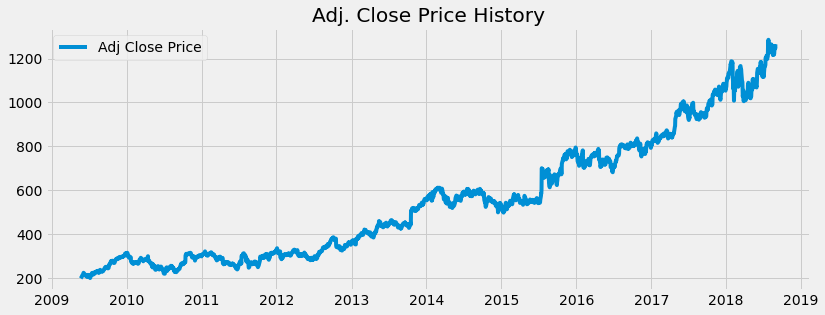

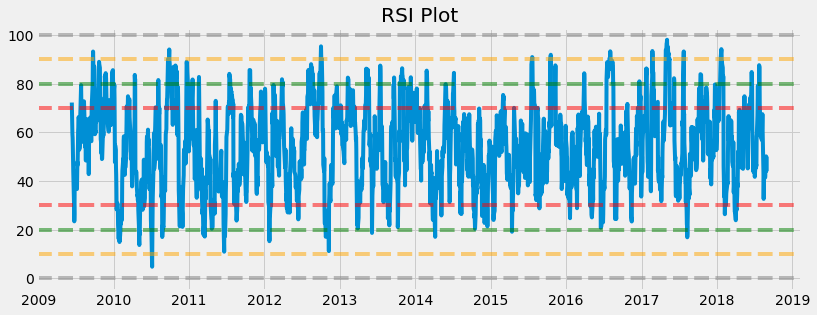

In [ ]:
# Visually show the adjusted close price and RSI

# Plot the adjusted close price
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()
# Plot the corresponding RSI values and the significant levels 
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')

plt.show()


# Run cell after data has been imported